`wu_generating_data.ipynb`

> Generating data for the wrap-unwrap problem

> Data should have some noise and spikes

##### imports & notebook setup

In [1]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter

from plot_styles import set_plotstyles
set_plotstyles()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

In [4]:
# frequency channels for all data

min_freq = 0.1   # GHz
max_freq = 0.2   # GHz
num_freqs = 1024
freqs = np.linspace(min_freq, max_freq, num_freqs) # GHz

In [5]:
# tau bounds
min_tau = -100 # ns
max_tau =  100 # ns

In [3]:
def get_slope(y, x = freqs):
    """
    Computes the mean slope of the data.
    Assumes the data is a *perfect* line
    
    Parameters
    ---------
    y (array) : complex data to be unwrapped
    x (array) : frequencies [GHz]
    
    Returns
    -------
    (float)  : slope of the line [nano-seconds]
    
    """
    return np.mean((np.diff(np.unwrap(y))  / (2 * np.pi)) / np.diff(x))

#### Generate data

> Data should have:
 - a low rate of spikes
 - a small amount of noise
  - occasional large amounts of noise

In [41]:
# how many entries in the dataframe?
num_entries = 10000

# each entry has a slope computed before noise & spikes are applied
tau_col = np.empty(num_entries)

# generate data
data = np.empty((num_entries, num_freqs))
for i in range(num_entries):
    
    # fix tau
    tau = np.random.uniform(low = min_tau,
                            high = max_tau) 
    
    # fix phi
    phi = np.random.uniform(high = 2 * np.pi)
    
    # generate angle data from complex data
    data[i]    = np.angle(np.exp(2*np.pi*1j * (tau*freqs + phi)))
    
    # compute slope
    tau_col[i] = get_slope(data[i])
    
    # some data gets more noise than others
    noise = np.random.normal(scale = np.random.uniform(low = 0, high = 1), size = len(freqs))
    
    # 5% of each entry gets a small random spike (gaussian mean = pi / 2)
    for j in range(len(freqs)):
        if np.random.uniform() < 0.05:
            noise[j] *= np.random.normal(np.pi)
            
    # add the noise to the data
    data[i] += noise

#### Visualize data

> Just to see how bad it is

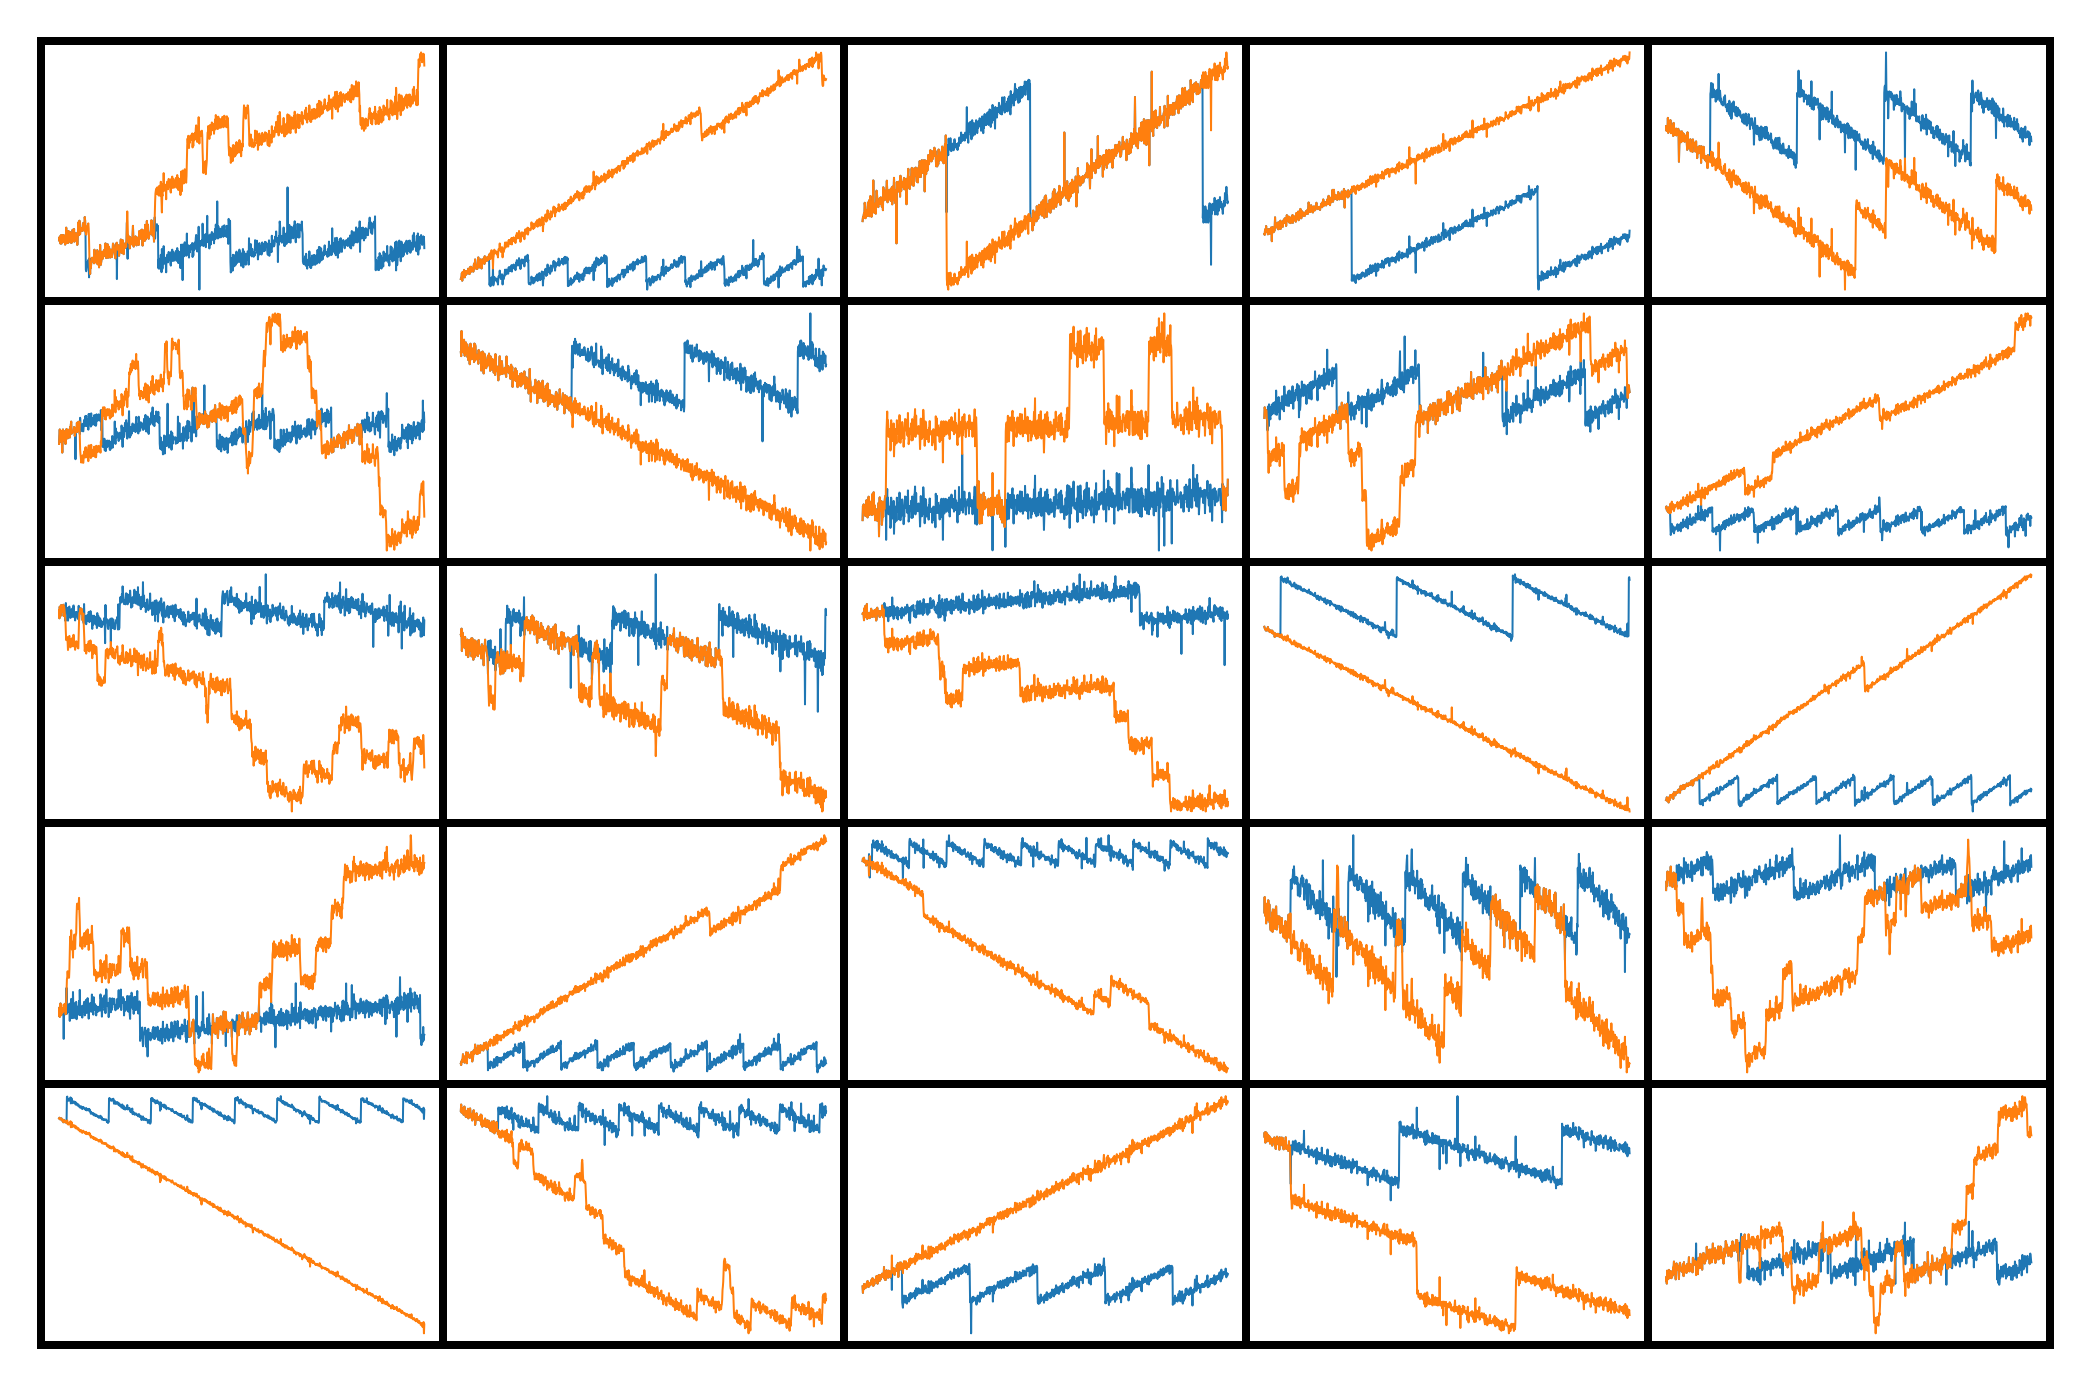

In [42]:
fig, axes = plt.subplots(5,5, figsize = (9, 6), dpi = 144)
nine_random_entries = np.random.choice(range(num_entries), size = 25)
for i, ax in enumerate(axes.reshape(-1)):
    
    ax.plot(freqs, data[nine_random_entries[i]],
            linewidth = 0.5)
    
    ax.plot(freqs, np.unwrap(data[nine_random_entries[i]]),
            linewidth = 0.5)

    
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.subplots_adjust(hspace = 0, wspace = 0)
plt.show()

#### save data

> save as a compressed file

> Filename convention:

`wu_10000_normal-uniform-noise_5-percent-normal-pi-spike.bz2`

"wrap-unwrap" \_ "number of entries" \_ "type of noise added" \_ "type of spikes added"

In [44]:
df = pd.DataFrame(data)
df.insert(0, 'tau', tau_col)
df.to_csv('data/wu_10000_normal-uniform-noise_5-percent-normal-pi-spike.bz2', index = False, compression = 'bz2')

In [2]:
two_up = up(up('data'))

In [6]:
import glob

['../wu_perfect_lin_tau_0_phase',
 '../wrap_data_test_1.csv',
 '../generating_data',
 '../wrap_data_test_2.csv',
 '../wu_fuzzy_rand_tau_rand_phase',
 '../wu_perfect_lin_tau_rand_phase',
 '../Untitled.ipynb',
 '../wrap_data_rand_tau_rand_phase_10000_noisey.csv',
 '../tf_noise',
 '../WU_variable_phase_generation.ipynb',
 '../wu_768_512_256_all_relu',
 '../wu_fitting_noisey_spikey_data',
 '../__pycache__',
 '../wu_increasing_difficulty',
 '../testing',
 '../wu_perfect_lin_tau_0_phase_NN_training.ipynb',
 '../logs',
 '../wu_iterative',
 '../wu_integer_tau_noisey_spikey',
 '../plot_styles.py',
 '../TF_Tau_Finder.ipynb',
 '../saturday',
 '../TF_tau_finder',
 '../wrap_data_rand_tau_rand_phase_10000.csv',
 '../TF_Tau_Finder-logs2.ipynb',
 '../wrap_unwrap_initial_exploration.ipynb',
 '../wrap_data_rand_tau_rand_phase_2500.csv',
 '../TF_Tau_Finder_Freqs.ipynb',
 '../Untitled Folder 1']